Let's break down the problem statement and solution in simple terms.

Problem Statement
You are given a dataset (sales_data_sample.csv) with sales information. Your goal is to:

Group similar sales data points together using a method called clustering.
Use a specific clustering technique called K-Means to find groups or "clusters" in the data.
Find the best number of groups (clusters) for the data using a method called the Elbow Method.
Think of this as finding patterns in sales data to see which items or orders are similar to each other based on certain features.

Steps in the Solution

Step 1: Load and Prepare the Data

First, load the dataset and pick the columns that are important for clustering, like QUANTITYORDERED, PRICEEACH, and SALES. These columns represent numeric information about each sale, and we use them to identify patterns.

Step 2: Find the Best Number of Clusters (Elbow Method)

To determine how many groups (clusters) are best, we use the Elbow Method:
We test the data with different numbers of clusters (like 1, 2, 3, up to 10).
For each number of clusters, we calculate a value called inertia (or WCSS, which measures how tightly grouped the data points are within each cluster).
We then plot these values on a graph. The point where the line "bends" or forms an "elbow" suggests the best number of clusters.

Step 3: Apply K-Means Clustering with the Chosen Number of Clusters

Based on the Elbow Method plot, we choose the number of clusters (let’s say it’s 4) and then:
Run the K-Means algorithm with 4 clusters.
The algorithm assigns each data point to one of these clusters, meaning it groups similar data points together.

Step 4: Add Cluster Labels to the Data
After clustering, we add a new column to the dataset called Cluster, which shows which group each data point belongs to.

In [1]:
import pandas as pd 

In [11]:
df = pd.read_csv('sales_data_sample.csv',encoding = 'unicode_escape')#remember uniode_escape

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [15]:
df = df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']]

In [17]:
from sklearn.cluster import KMeans

intertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    intertia.append(kmeans.inertia_)#remember these 3 lines

In [19]:
import seaborn as sns

<Axes: >

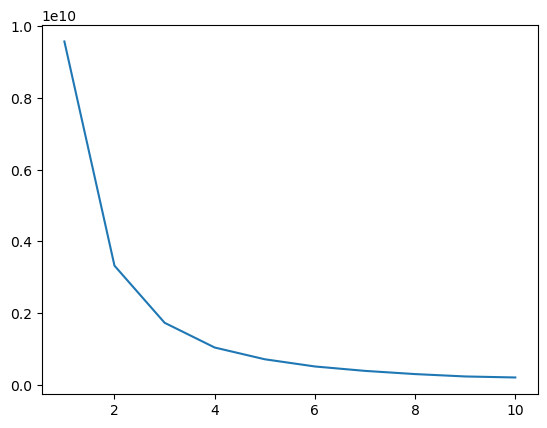

In [21]:
sns.lineplot(x=range(1, 11), y=intertia, )

In [23]:
# Optimal K = 4
kmeans = KMeans(n_clusters=4)
df['Cluster']  = kmeans.fit_predict(df) #imp

In [25]:
df

QUANTITYORDERED  PRICEEACH    SALES  Cluster
0                  30      95.70  2871.00        2
1                  34      81.35  2765.90        2
2                  41      94.74  3884.34        2
3                  45      83.26  3746.70        2
4                  49     100.00  5205.27        1
...               ...        ...      ...      ...
2818               20     100.00  2244.40        0
2819               29     100.00  3978.51        2
2820               43     100.00  5417.57        1
2821               34      62.24  2116.16        0
2822               47      65.52  3079.44        2

[2823 rows x 4 columns]

import pandas as pd 
df = pd.read_csv('sales_data_sample.csv',encoding = 'unicode_escape')
df = df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']]
from sklearn.cluster import KMeans

intertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    intertia.append(kmeans.inertia_)
import seaborn as sns
sns.lineplot(x=range(1, 11), y=intertia, )
# Optimal K = 4
kmeans = KMeans(n_clusters=4)
df['Cluster']  = kmeans.fit_predict(df)
df